In [170]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [171]:
data = 'https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv'
!wget $data

--2023-09-24 12:43:22--  https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1423529 (1.4M) [text/plain]
Saving to: ‘housing.csv.3’

housing.csv.3       100%[===================>]   1.36M  6.72MB/s    in 0.2s    

2023-09-24 12:43:22 (6.72 MB/s) - ‘housing.csv.3’ saved [1423529/1423529]



## **Data Prepation**

In [192]:
df = pd.read_csv("housing.csv")
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [173]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [174]:
df.ocean_proximity.unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [175]:
a = df[['ocean_proximity']].copy()
categories_list = df.ocean_proximity.unique()
for i in ['NEAR BAY', '<1H OCEAN']:
    a['ocean_proximity_%s'%i]= (a.ocean_proximity==i).astype('int')
a

,ocean_proximity,ocean_proximity_NEAR BAY,ocean_proximity_<1H OCEAN
0,NEAR BAY,1,0
1,NEAR BAY,1,0
2,NEAR BAY,1,0
3,NEAR BAY,1,0
4,NEAR BAY,1,0
...,...,...,...
20635,INLAND,0,0
20636,INLAND,0,0
20637,INLAND,0,0
20638,INLAND,0,0


In [176]:
np.log1p(df.median_house_value)

0        13.022766
1        12.789687
2        12.771673
3        12.740520
4        12.743154
           ...    
20635    11.265758
20636    11.252872
20637    11.432810
20638    11.346883
20639    11.400887
Name: median_house_value, Length: 20640, dtype: float64

<Axes: xlabel='median_house_value', ylabel='Count'>

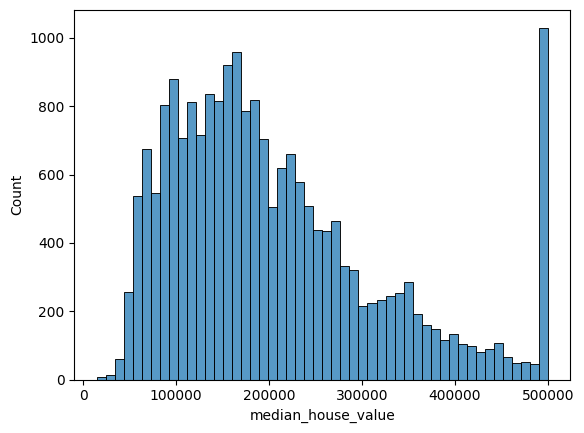

In [177]:
sns.histplot(df.median_house_value, bins=50)

<Axes: xlabel='median_house_value', ylabel='Count'>

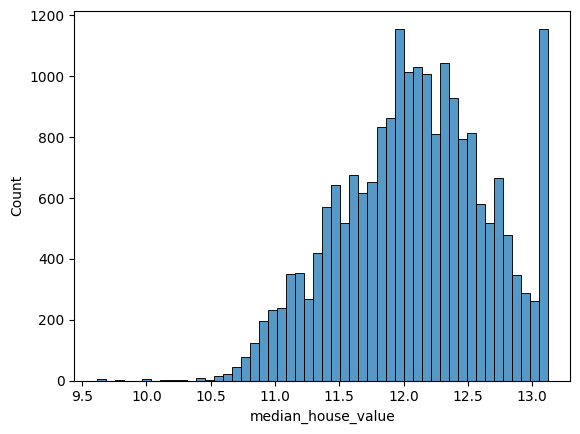

In [178]:
sns.histplot(np.log1p(df.median_house_value),bins=50)

In [179]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [180]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [181]:
df.dtypes

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity        object
dtype: object

In [182]:
df_train = df.iloc[idx[:n_train]]
df_val = df.iloc[idx[n_train:n_train+n_val]]
df_test= df.iloc[idx[n_train+n_val:]]
df_train

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20046,-119.01,36.06,25.0,1505.0,NaN,1392.0,359.0,1.6812,47700.0,INLAND
3024,-119.46,35.14,30.0,2943.0,NaN,1565.0,584.0,2.5313,45800.0,INLAND
15663,-122.44,37.80,52.0,3830.0,NaN,1310.0,963.0,3.4801,500001.0,NEAR BAY
20484,-118.72,34.28,17.0,3051.0,NaN,1705.0,495.0,5.7376,218600.0,<1H OCEAN
9814,-121.93,36.62,34.0,2351.0,NaN,1063.0,428.0,3.7250,278000.0,NEAR OCEAN
...,...,...,...,...,...,...,...,...,...,...
10292,-117.81,33.88,19.0,2265.0,283.0,904.0,279.0,9.2327,461300.0,<1H OCEAN
16722,-120.68,35.48,15.0,2608.0,525.0,1351.0,502.0,2.7798,205800.0,<1H OCEAN
11730,-120.91,38.98,13.0,7689.0,1415.0,3264.0,1198.0,3.6530,146800.0,INLAND
5993,-117.72,34.09,36.0,1473.0,328.0,785.0,299.0,3.2566,151800.0,INLAND


In [206]:
def X_prepare(X):
    df = X.copy()
    
    
    base = ['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value']
    for i in ['NEAR BAY', '<1H OCEAN']:
        df['ocean_proximity_%s'%i]= (a.ocean_proximity==i).astype('int')
        base.append('ocean_proximity_%s'%i)
   
    
    df = df[base]
    
    
    return df

In [184]:
def linear_regression(x,w0,w):


    pred = w0 + x.dot(w)

    return pred

In [185]:
def train_linear_regression(X,y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones,X])
    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    w0 = w_full[0]
    w = w_full[1:]
    
    return w0,w

In [186]:
def rmse(y, y_pred):
    square = (y - y_pred) ** 2
    mean_sq = square.mean()
    return np.sqrt(mean_sq)

In [210]:
df = pd.read_csv("housing.csv")
df = df.fillna(0)

n = len(df)
n_train = int(n * 0.6)
n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train,n_test,n_val,n

idx= np.arange(n)
np.random.seed(42)
np.random.shuffle(idx)

df_train = df.iloc[idx[:n_train]]
df_val = df.iloc[idx[n_train:n_train+n_val]]
df_test= df.iloc[idx[n_train+n_val:]]

df_train = X_prepare(df_train)
df_val = X_prepare(df_val)
df_test = X_prepare(df_test)

y_train = np.log1p(df_train.median_house_value.values)
y_val = np.log1p(df_val.median_house_value.values)
y_test = np.log1p(df_test.median_house_value.values)

del df_train['median_house_value']
del df_val['median_house_value']
del df_test['median_house_value']

In [211]:
w0,w = train_linear_regression(df_train,y_train)
y_pred = linear_regression(df_train,w0,w)
score = rmse(y_train,y_pred)
round(score, 2)

0.34

In [225]:
w0,w = train_linear_regression(df_train,y_train)
y_pred = linear_regression(df_val,w0,w)
score = rmse(y_val,y_pred)
round(score, 2)

0.32

<Axes: ylabel='Count'>

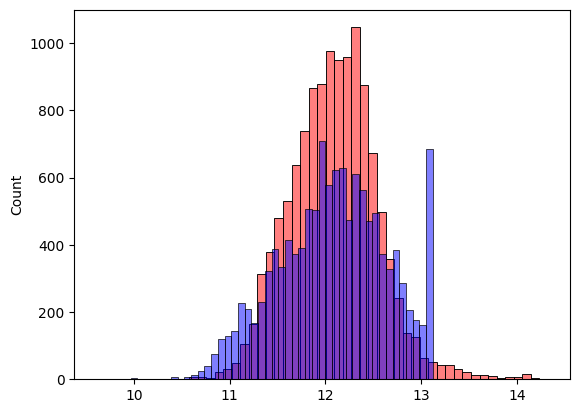

In [201]:
sns.histplot(y_pred, color='red', alpha=0.5, bins=50)
sns.histplot(y_train, color='blue', alpha=0.5, bins=50)

In [226]:

df = pd.read_csv("housing.csv")
df = X_prepare(df)

n = len(df)
n_train = int(n * 0.6)
n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train,n_test,n_val,n

idx= np.arange(n)
np.random.seed(42)
np.random.shuffle(idx)

df_train = df.iloc[idx[:n_train]]
df = df.fillna(df.mean())

df_train = df.iloc[idx[:n_train]]
df_val = df.iloc[idx[n_train:n_train+n_val]]
df_test= df.iloc[idx[n_train+n_val:]]



y_train = np.log1p(df_train.median_house_value.values)
y_val = np.log1p(df_val.median_house_value.values)
y_test = np.log1p(df_test.median_house_value.values)

del df_train['median_house_value']
del df_val['median_house_value']
del df_test['median_house_value']
w0,w = train_linear_regression(df_train,y_train)
y_pred = linear_regression(df_train,w0,w)
score = rmse(y_train,y_pred)
round(score, 2)

0.34

In [227]:
y_pred = linear_regression(df_val,w0,w)
score = rmse(y_val,y_pred)
round(score, 2)

0.32

In [214]:
def train_linear_regression_reg(X,y,r):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones,X])
    XTX = X.T.dot(X)
    XTX = XTX + r * np.eye(XTX.shape[0])
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    w0 = w_full[0]
    w = w_full[1:]
    
    return w0,w

In [215]:
df = pd.read_csv("housing.csv")
df = df.fillna(0)

n = len(df)
n_train = int(n * 0.6)
n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train,n_test,n_val,n

idx= np.arange(n)
np.random.seed(42)
np.random.shuffle(idx)

df_train = df.iloc[idx[:n_train]]
df_val = df.iloc[idx[n_train:n_train+n_val]]
df_test= df.iloc[idx[n_train+n_val:]]

df_train = X_prepare(df_train)
df_val = X_prepare(df_val)
df_test = X_prepare(df_test)

y_train = np.log1p(df_train.median_house_value.values)
y_val = np.log1p(df_val.median_house_value.values)
y_test = np.log1p(df_test.median_house_value.values)

del df_train['median_house_value']
del df_val['median_house_value']
del df_test['median_house_value']



In [231]:
for r in [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]:
    w0,w = train_linear_regression_reg(df_train,y_train,r)
    y_pred = linear_regression(df_val,w0,w)
    score = rmse(y_val,y_pred)
    
    print(r,round(score, 2))

0 0.32
1e-06 0.32
0.0001 0.32
0.001 0.32
0.01 0.32
0.1 0.32
1 0.33
5 0.33
10 0.33


In [232]:
scores = []
for i in [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]:
    df = pd.read_csv("housing.csv")
    df = df.fillna(0)

    n = len(df)
    n_train = int(n * 0.6)
    n_val = int(n * 0.2)
    n_test = int(n * 0.2)
    n_train,n_test,n_val,n

    idx= np.arange(n)
    np.random.seed(i)
    np.random.shuffle(idx)

    df_train = df.iloc[idx[:n_train]]
    df_val = df.iloc[idx[n_train:n_train+n_val]]
    df_test= df.iloc[idx[n_train+n_val:]]

    df_train = X_prepare(df_train)
    df_val = X_prepare(df_val)
    df_test = X_prepare(df_test)

    y_train = np.log1p(df_train.median_house_value.values)
    y_val = np.log1p(df_val.median_house_value.values)
    y_test = np.log1p(df_test.median_house_value.values)

    del df_train['median_house_value']
    del df_val['median_house_value']
    del df_test['median_house_value']

    w0,w = train_linear_regression(df_train,y_train)
    y_pred = linear_regression(df_val,w0,w)
    scores.append(rmse(y_val,y_pred))

In [236]:
std = np.std(scores)
round(std, 3)

0.004

In [238]:
df = pd.read_csv("housing.csv")
df = df.fillna(0)

n = len(df)
n_train = int(n * 0.6)
n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train,n_test,n_val,n

idx= np.arange(n)
np.random.seed(9)
np.random.shuffle(idx)

df_train = df.iloc[idx[:n_train]]
df_val = df.iloc[idx[n_train:n_train+n_val]]
df_test= df.iloc[idx[n_train+n_val:]]

df_train = X_prepare(df_train)
df_val = X_prepare(df_val)
df_test = X_prepare(df_test)

y_train = np.log1p(df_train.median_house_value.values)
y_val = np.log1p(df_val.median_house_value.values)
y_test = np.log1p(df_test.median_house_value.values)

del df_train['median_house_value']
del df_val['median_house_value']
del df_test['median_house_value']

df_full_train = pd.concat([df_train, df_val])
df_full_train = df_full_train.reset_index(drop=True)
y_full_train = np.concatenate([y_train, y_val])

w0,w = train_linear_regression_reg(df_full_train,y_full_train,0.001)
y_pred = linear_regression(df_test,w0,w)
score = rmse(y_test,y_pred)
score

0.3385063056027665